In [5]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

print("Loading MNIST dataset...")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

X = mnist_train.data.numpy().reshape(-1, 28 * 28)
y = mnist_train.targets.numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sample_size = 5000
X_sampled = X_scaled[:sample_size]
y_sampled = y[:sample_size]

def visualize_2d(data, labels, title):
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
    plt.colorbar(scatter, label='Digits')
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()


Loading MNIST dataset...


PCA implement

Performing PCA...


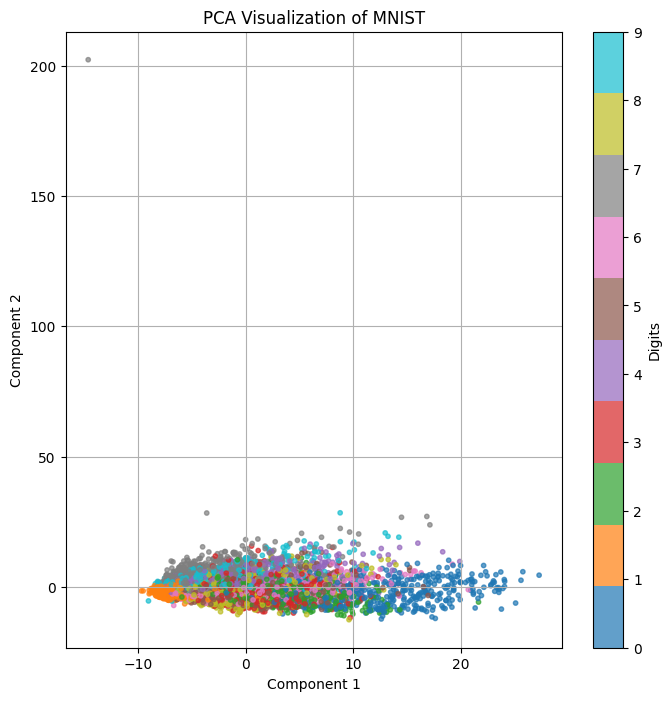

In [8]:
print("Performing PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled)
visualize_2d(X_pca, y_sampled, "PCA Visualization of MNIST")

LDA implement

Performing LDA...


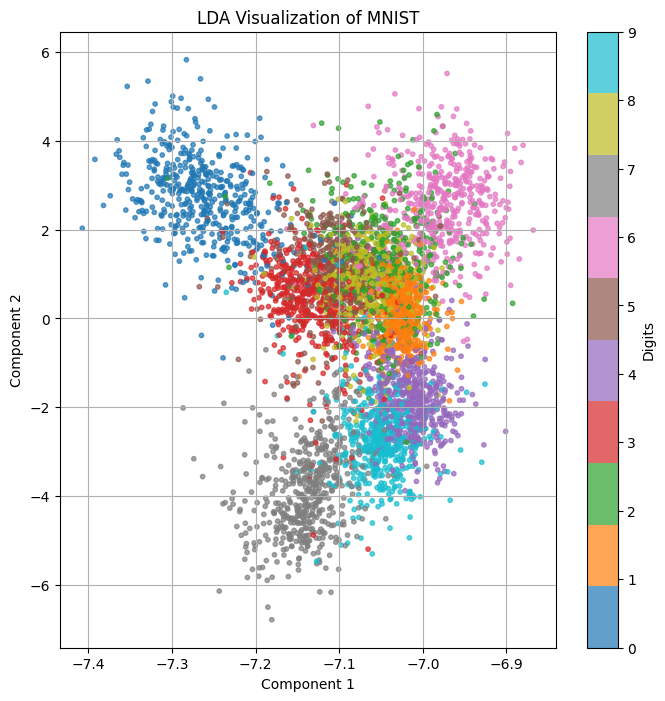

In [6]:
print("Performing LDA...")
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_sampled, y_sampled)
visualize_2d(X_lda, y_sampled, "LDA Visualization of MNIST")

t-SNE implement

Performing t-SNE...


c:\Anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


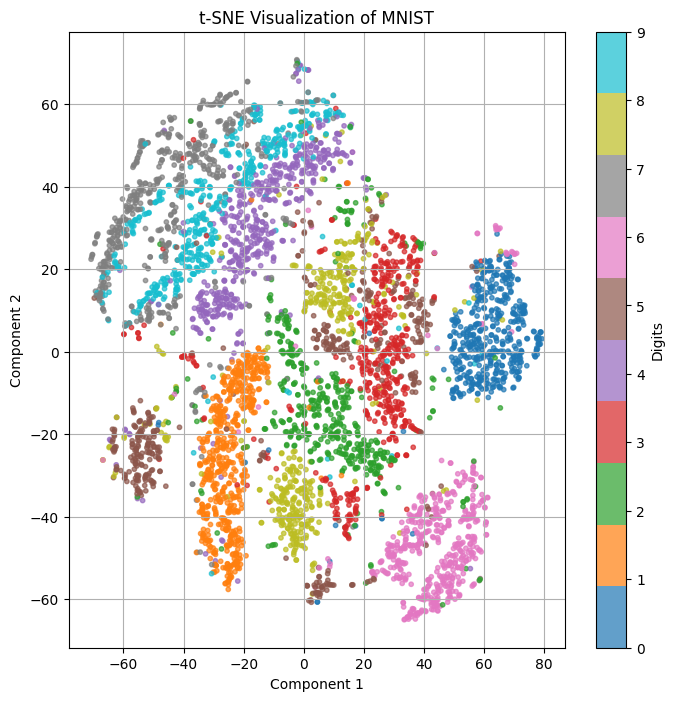

In [7]:
print("Performing t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_sampled)
visualize_2d(X_tsne, y_sampled, "t-SNE Visualization of MNIST")